In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
bt_data = pd.read_csv('data/bt_data.csv',parse_dates=True, index_col=0, engine='python')
bt_data

,content,location,date,satisfaction,customer_service,speed,reliability
0,Awful service awful internet speed and reliab...,Manchester,2017-07-06,1.0,1.0,1.0,1.0
1,Poor customer service. Had to speak to 7 peopl...,Norbury,2017-07-06,2.0,2.0,3.0,3.0
2,Dreadful in every aspect. It simply does not w...,Tenbury Wells,2017-07-05,1.0,1.0,1.0,1.0
3,SHOCKING service. Placed order got told it wi...,Morpeth,2017-07-04,1.0,1.0,1.0,1.0
4,Very unhappy with connection quality and custo...,Norfolk,2017-07-04,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
3187,Just a warning about BT Infinity the BT Hub b...,Wales,2017-08-26,1.0,1.0,3.0,1.0
3188,I have had a contract with BT for telephone b...,Wimbledon,2017-08-26,1.0,1.0,1.0,1.0
3189,Little satisfaction from BT sales/help; poor s...,Norton Bavant,2017-08-26,1.0,1.0,1.0,2.0
3190,Just don't do it. New build took 11 weeks for...,Milton Keynes,2017-08-25,1.0,1.0,5.0,3.0


In [39]:
bt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192 entries, 0 to 3191
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   content           3189 non-null   object 
 1   location          3134 non-null   object 
 2   date              3192 non-null   object 
 3   satisfaction      2832 non-null   float64
 4   customer_service  2796 non-null   float64
 5   speed             2773 non-null   float64
 6   reliability       2761 non-null   float64
dtypes: float64(4), object(3)
memory usage: 199.5+ KB


In [40]:
bt_data['date'] = pd.to_datetime(bt_data['date'])
bt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3192 entries, 0 to 3191
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   content           3189 non-null   object        
 1   location          3134 non-null   object        
 2   date              3192 non-null   datetime64[ns]
 3   satisfaction      2832 non-null   float64       
 4   customer_service  2796 non-null   float64       
 5   speed             2773 non-null   float64       
 6   reliability       2761 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 199.5+ KB


In [41]:
bt_data.head()

,content,location,date,satisfaction,customer_service,speed,reliability
0,Awful service awful internet speed and reliab...,Manchester,2017-07-06,1.0,1.0,1.0,1.0
1,Poor customer service. Had to speak to 7 peopl...,Norbury,2017-07-06,2.0,2.0,3.0,3.0
2,Dreadful in every aspect. It simply does not w...,Tenbury Wells,2017-07-05,1.0,1.0,1.0,1.0
3,SHOCKING service. Placed order got told it wi...,Morpeth,2017-07-04,1.0,1.0,1.0,1.0
4,Very unhappy with connection quality and custo...,Norfolk,2017-07-04,1.0,1.0,1.0,1.0


In [15]:
def count_review(df, group):
    review_count = df.groupby(df['date'].dt.strftime(group))['satisfaction','customer_service','speed','reliability'].count()
    review_count = review_count.reset_index(level=['date'])
    return review_count

In [55]:
review_count_year = count_reviews(bt_data, group='%Y')

df= pd.DataFrame(review_count_year) 
df.to_csv('review_count_year.csv')

review_count_year

 

/var/folders/2_/ycfm8bm13bb6ksx24_tk0_wc0000gn/T/ipykernel_11526/3476114791.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  review_count = df.groupby(df['date'].dt.strftime(group))['satisfaction','customer_service','speed','reliability'].count()


,date,satisfaction,customer_service,speed,reliability
0,2009,75,86,73,80
1,2010,26,23,26,26
2,2011,18,17,17,18
3,2012,8,6,8,8
4,2013,21,19,18,19
5,2014,244,239,237,234
6,2015,454,444,443,432
7,2016,628,614,609,605
8,2017,504,499,499,496
9,2018,422,418,420,420


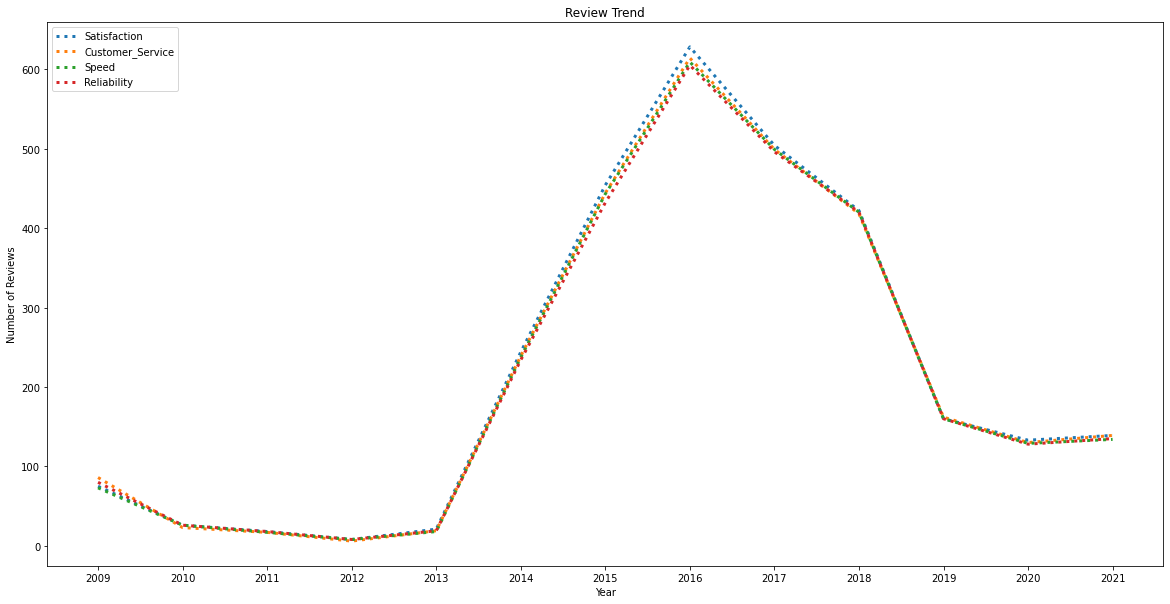

In [10]:
df = pd.read_csv("review_count_year.csv")


Year_Data = df ['date'].tolist()
Satisfaction_Data = df ['satisfaction'].tolist()
Customer_Service_Data = df ['customer_service'].tolist()
Speed_Data = df ['speed'].tolist()
Reliability_Data = df ['reliability'].tolist()

plt.figure(figsize=(20,10))
plt.plot(Year_Data, Satisfaction_Data,   label = 'Satisfaction', linestyle = 'dotted', linewidth=3)
plt.plot(Year_Data, Customer_Service_Data,   label = 'Customer_Service',  linestyle ='dotted', linewidth=3)
plt.plot(Year_Data, Speed_Data, label = 'Speed', linestyle ='dotted', linewidth=3)
plt.plot(Year_Data, Reliability_Data, label = 'Reliability', linestyle ='dotted', linewidth=3)


plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(loc='upper left')
plt.xticks(Year_Data)
plt.yticks()
plt.title('Review Trend')
plt.show()

The above graph looks at the trend in different types of rating such as satisfaction, speed, reliability and customer service. We can infer that, the trend between the different types of ratings has moved in a linear fashion in the last decade. However, we can also see that there was a gradual growth in the number of ratings in each category, peaking in the year of 2016 primarily due to increased customer base owing to the EE acquisition.